## Thursday 20-10-2022

EDA Exploratory Data Analysis
1. maximize insights into a dataset
2. see any underlying structures
3. identify the import variables or feature
4. detect outliers
5. test your underlying assumptions


What we 

# import packages

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set juyter to display up to 30 columns, so it can fit well on the screen
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)


sns.set_palette('hls')
#show figures in notebook
%matplotlib inline

In [4]:
df= pd.read_csv('loans.csv')
df

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


In [5]:
#get 3 random sample of our data
#lets get 3 rows

df.sample(n=3)

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
1448,1568888,1275,7,fundraising,NaN,175,12,GH,Retail,"Charity, a resident of Nsawam, in the Eastern ...","to buy stocks to sell such as rice, cooking oi..."
1131,1534737,4400,150,funded,2018-06-05T19:12:37Z,4400,7,CD,Retail,Madam Thethe is a client of Hekima and a vendo...,"to buy 12 pairs of shoes, children's clothes, ..."
708,1548654,725,28,funded,2018-06-18T16:16:13Z,725,40,CM,Agriculture,She is married and a mother of four children w...,"rent farmland, buy seedlings and fertilizer."


###### 1. Type checking
why is it important?
because
- the types of a feature affects what you can do to that column
this relates to the type of function you can apply on the column
- the common data types you will see are 
1. int
2. float
3. str
4. boolean
5. datetime

lets check the type of variable we have

In [6]:
#list all the columns

df.columns

Index(['id_number', 'loan_amount', 'lender_count', 'status', 'funded_date',
       'funded_amount', 'repayment_term', 'location_country_code', 'sector',
       'description', 'use'],
      dtype='object')

In [7]:
df.columns.to_list()

['id_number',
 'loan_amount',
 'lender_count',
 'status',
 'funded_date',
 'funded_amount',
 'repayment_term',
 'location_country_code',
 'sector',
 'description',
 'use']

In [8]:
#checking the data types
df['id_number'].dtype

dtype('int64')

In [9]:
df['location_country_code'].dtype

dtype('O')

In [10]:
df['status'].dtype

dtype('O')

In [11]:
df['funded_amount'].dtype

dtype('int64')

In [12]:
df['funded_date'].dtype

dtype('O')

In [13]:
#checking all the data types together

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


In [14]:
df.description[6014]

'Sethukelo is a 19-year-old entrepreneur who lives with her mother and siblings in the Lupane District of Zimbabwe.  She is requesting a Kiva loan in order to start her own grocery business.  <br /><br />Sethukelo plans to use the profit she earns to support herself, her mother, and her siblings.  She will repay the ‘social interest’ on her loan by volunteering 2.5 hours per week as a Camfed Transition Guide.  Her responsibilities include supporting other young women who are just entering Camfed’s alumnae organization, CAMA.  She will also deliver weekly sessions of an orientation course on topics such as health, financial literacy, and career guidance.'

In [15]:
df.repayment_term

0        8
1       12
2       14
3       14
4       13
        ..
6014    14
6015    14
6016    14
6017    14
6018    14
Name: repayment_term, Length: 6019, dtype: int64

In [16]:
df['status'].unique()

array(['funded', 'fundraising', 'expired'], dtype=object)

In [17]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   id_number              int64 
 1   loan_amount            int64 
 2   lender_count           int64 
 3   status                 object
 4   funded_date            object
 5   funded_amount          int64 
 6   repayment_term         int64 
 7   location_country_code  object
 8   sector                 object
 9   description            object
 10  use                    object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


##### 2.) missing values
- its not all about knowing the missing values alone
- if we have missing data, is it missing randomly,
    if yes, we might not remove it cuz its still representative of the data set and in this
    case, we can ignore them.....
- if the data is missing systematically, you have to be more careful about 
    dealing with the missing data to avoid bias. think about how to carefully
    clean the data (dropping data points, filling by group etc)

In [18]:
#chek for missing value

df.isna().sum()

id_number                  0
loan_amount                0
lender_count               0
status                     0
funded_date              937
funded_amount              0
repayment_term             0
location_country_code     17
sector                     0
description              342
use                      342
dtype: int64

In [19]:
#lambda is an anonymous function
#it doesnt need to be defined

x = lambda b: b+10
print(x(5))

15


In [20]:
#lets use a function

def missing_num(x):
    return sum(x.isnull())

print('Missing values per column')
#applying our function by column
#check sum of missing values by column and get the columns where the sum is not zero

print(df.apply(missing_num, axis = 0).where(lambda x: x!=0).dropna())


Missing values per column
funded_date              937.0
location_country_code     17.0
description              342.0
use                      342.0
dtype: float64


#### 3) Sanity checks
###### Does the data make sense? Does it match what you expect to find

- is the range of values what you would expect? eg, allloan amounts must be greater than zero
    funded amount cant be negative
- do you have the number of rows expected
- do you have reasonable dates, dates cant be future and should be too far ago e.g 1900, 1889
- do you have unexpected spikes in any of the int columns or even over time.









In [21]:
df

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


In [22]:
df.loan_amount.min()

50

In [23]:
df.funded_amount.min()

0

#### 4) Descriptive stat of the dataset

In [24]:
#we can check the key summaries of the dataset (numerical column)
#using the describe methoed

df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


In [25]:
#to get the summary of the object columns
#first, create a variable that holds the categorical or object column data type
#then we can get the description using describe method

categorical = df.dtypes[df.dtypes == 'object'].index
df[categorical].describe()

,status,funded_date,location_country_code,sector,description,use
count,6019,5082,6002,6019,5677,5677
unique,3,4453,30,14,5277,4325
top,funded,2018-07-22T15:54:41Z,TZ,Food,Zaina is 19-year-old entrepreneur who lives wi...,to pay for a stove.
freq,5082,9,400,1738,2,80


In [26]:
categorical

Index(['status', 'funded_date', 'location_country_code', 'sector',
       'description', 'use'],
      dtype='object')

## EDA 2
##### 24-10-2022

- maximize insights into data
- uncover any underlying structure
- exract important variables
- detect outliers and anomalies
- test underlying assumptions


now lets look at the fllg plotting techniques
- scatter plot
- scatter matrix
- histogram
- bar plot
- box plot
- time series

#### 1. Scatter plot
this is very popular and very powerful way to visualize your data and relationship btw
two continous features.
it shows us how feature Y changes when X changes.
if there is a clear pattern on the scatter plot, then we can say 
the features are correlated.

We see several outcomes in a scatter plot:
- positive linear outcome =  when X increases, the data points

- Lets use this on two continous column in our data

In [27]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [28]:
numeric_var = df.select_dtypes(include=[np.number]).columns.to_list()
numeric_var

['id_number', 'loan_amount', 'lender_count', 'funded_amount', 'repayment_term']

In [31]:
numeric_var = df.select_dtypes(include=[np.number]).columns.to_list()
for var in numeric_var:
    print(var)

id_number
loan_amount
lender_count
funded_amount
repayment_term


- lets check if there is a relationship between lender_count and loan_amount

- intuitively, you expect a relationship, lets check if it is true

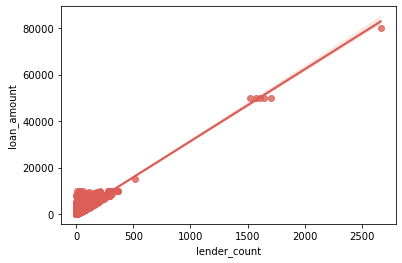

In [32]:
ax = sns.regplot(x = 'lender_count', y = 'loan_amount', data=df)

Where does the data follow the line?
where does it not?
what else do you think this graph is telling you?
is the relationship between the features positively correlated or linear?


if you want to explore this further you can take data points corresponding to each cluster (eg, lender_count < 1000, lender_count between 1000 and 2000 possibly the rest)
then do a scatter plot of the same features, to zoom in on the relationship

#### 're' means regular expression

what about repayment_term and loan_amount

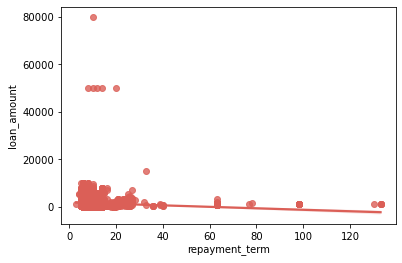

In [34]:
ax = sns.regplot(x = 'repayment_term', y = 'loan_amount', data = df)

#### 2. Scatter matrix

when we have lots of continous variables, we could use a scatterplot matrix to view their relationship with the numerical features. 

In [36]:
cols = ['lender_count', 'loan_amount', 'status']
new_df = df[cols]

In [37]:
new_df

,lender_count,loan_amount,status
0,60,4825,funded
1,34,975,funded
2,25,950,funded
3,28,825,funded
4,21,725,funded
...,...,...,...
6014,8,200,funded
6015,8,200,funded
6016,6,200,funded
6017,8,200,funded


In [1]:
#remove NaN so seaborn can plot
new_df = new_df.dropna(axis = 0, how = 'any')

#create a scatter plot along status distribution
sns.pairplot(new_df, hue = 'status')

NameError: name 'new_df' is not defined

what can you say about the plotted data?
did this new plot give more info about the features?
if yes, what is the new detail 

In [40]:
df.location_country_code.unique()

array(['BJ', 'BW', 'BF', 'BI', 'CM', 'CG', 'CD', 'EG', 'GH', 'CI', 'KE',
       'LS', 'LR', 'MG', 'MW', 'ML', 'MR', 'MZ', nan, 'NG', 'RW', 'SN',
       'SL', 'SO', 'ZA', 'SS', 'TZ', 'TG', 'UG', 'ZM', 'ZW'], dtype=object)

In [41]:
columns = ['lender_count', 'loan_amount', 'sector']
num_df = df[columns]
num_df = num_df.dropna(axis = 0, how = 'any')


In [44]:
num_df

,lender_count,loan_amount,sector
0,60,4825,Retail
1,34,975,Food
2,25,950,Services
3,28,825,Retail
4,21,725,Retail
...,...,...,...
6014,8,200,Food
6015,8,200,Food
6016,6,200,Clothing
6017,8,200,Food


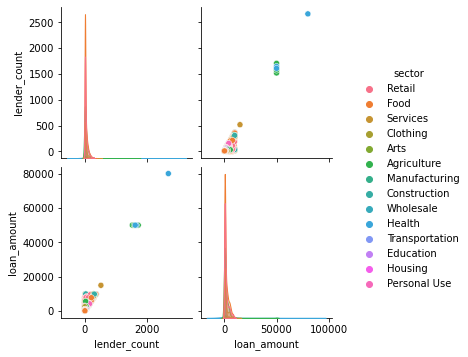

In [46]:
sns.pairplot(num_df, hue = 'sector')

In [51]:
column = ['funded_amount', 'loan_amount', 'status']
df2 = df[column]
df2 = df2.dropna(axis = 0, how = 'any')
df2

,funded_amount,loan_amount,status
0,4825,4825,funded
1,975,975,funded
2,950,950,funded
3,825,825,funded
4,725,725,funded
...,...,...,...
6014,200,200,funded
6015,200,200,funded
6016,200,200,funded
6017,200,200,funded


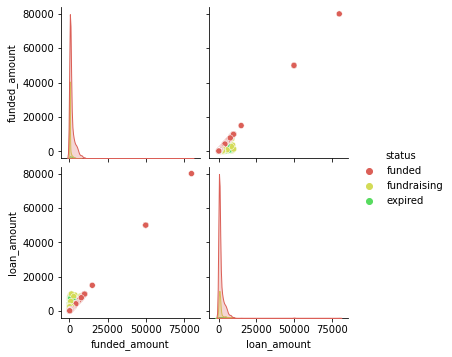

In [52]:
sns.pairplot(df2, hue ='status')

#### 3. Histogram

Histogram is useful for looking at the distribution of a single variable or column
it helps in identifying skewness and conseqquently ouliers. it shows count of the data.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

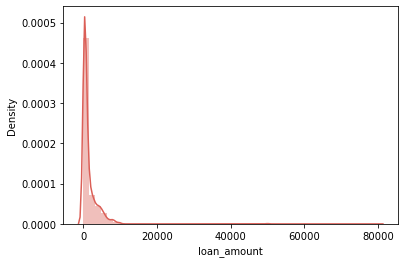

In [57]:
sns.distplot(df.loan_amount.dropna(axis=0))

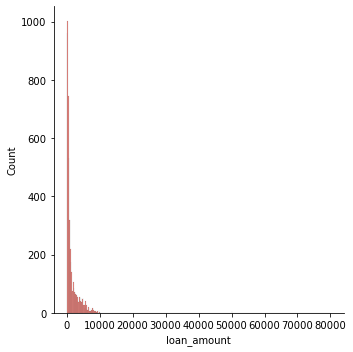

In [55]:
sns.displot(df['loan_amount'].dropna(axis=0))

#### check this later
- is there a higher occurence of small loans than big loan? How can you tell ?
- is the distribution skewed? 
- what might this type of skewnwss be telling us?
- how can we deal with a skewed distribution, speccially?
- coud the seeming skewness be caused by outliers?

In [58]:
#loan amount less than 5000

small_loan = df[(df['loan_amount'] < 5000)]
small_loan


,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


In [59]:
small_loan.min()

C:\Users\User\AppData\Local\Temp\ipykernel_19236\2169251887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  small_loan.min()


id_number               13772
loan_amount                50
lender_count                0
status                expired
funded_amount               0
repayment_term              3
sector            Agriculture
dtype: object

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

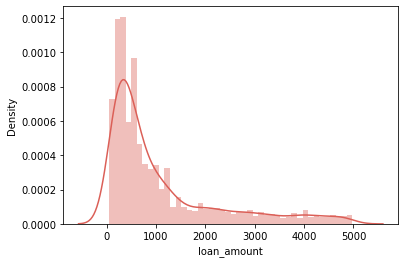

In [60]:
sns.distplot(small_loan['loan_amount'])

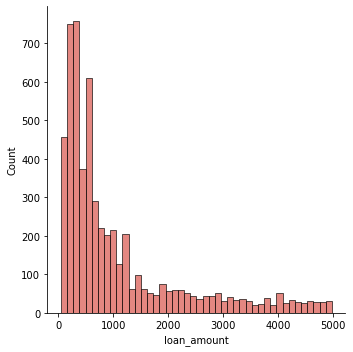

In [78]:
sns.displot(small_loan['loan_amount'])

#### 5. Bar Plot

In [1]:
p = sns.barplot(x = 'sector', y = 'loan_amount', data = df, estimator = np.mean);
p.set(title = 'Average loan amount by sector');
p.set_xticklabels(p.get_xticklabels(), rotation = -4);

NameError: name 'sns' is not defined

[Text(0, 0, 'Retail'),
 Text(1, 0, 'Food'),
 Text(2, 0, 'Services'),
 Text(3, 0, 'Clothing'),
 Text(4, 0, 'Arts'),
 Text(5, 0, 'Agriculture'),
 Text(6, 0, 'Manufacturing'),
 Text(7, 0, 'Construction'),
 Text(8, 0, 'Wholesale'),
 Text(9, 0, 'Health'),
 Text(10, 0, 'Transportation'),
 Text(11, 0, 'Education'),
 Text(12, 0, 'Housing'),
 Text(13, 0, 'Personal Use')]

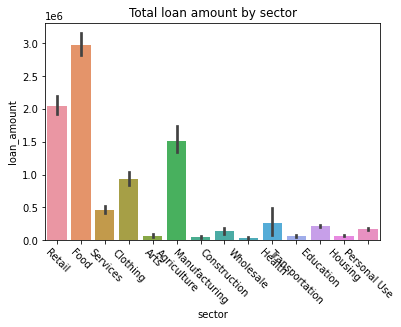

In [63]:
p = sns.barplot(x = 'sector', y = 'loan_amount', data = df, estimator = np.sum);
p.set(title = 'Total loan amount by sector')
p.set_xticklabels(p.get_xticklabels(), rotation = -45)

1. For graphs, which sector has the largest total and average loan amount?
2. If the sectors are diff why do you think it happened?

#### 6. Box plot

 A box plot describes five major summaries (min, first quartile, second quartile/median, third quartile and max).

- The central rectangle spans the first quartile to the 3rd (IQR).
- there is a (segment) line in the rectangle that shows the median
- the whiskers above and below the plot shows the max and min values

In [66]:
df_retail = df[df.sector=='Retail']
df_retail

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5990,1569437,200,5,funded,2018-07-20T13:34:34Z,200,14,ZW,Retail,Anna is an 18-year-old entrepreneur who lives ...,"to start her own grocery shop, selling sweets,..."
5991,1569452,200,8,funded,2018-07-21T15:30:14Z,200,14,ZW,Retail,Beverly is a 21-year-old entrepreneur who live...,to purchase more groceries to sell and expand ...
5994,1569464,200,8,funded,2018-07-21T11:30:11Z,200,14,ZW,Retail,Princess is a 20-year-old entrepreneur who liv...,to purchase hair products.
5995,1569471,200,7,funded,2018-07-20T14:19:48Z,200,14,ZW,Retail,Edith is a 23-year-old entrepreneur who lives ...,to start her own grocery shop selling differen...


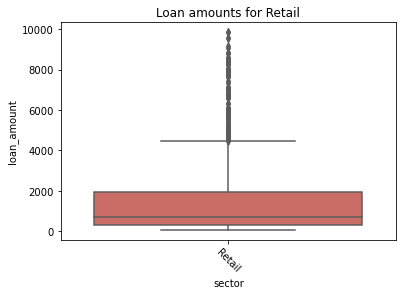

In [65]:
sector = 'Retail'
df_sector = df[df.sector==sector]
p = sns.boxplot(x = 'sector', y = 'loan_amount', data = df_sector)

p.set(title = f'Loan amounts for {sector}')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);

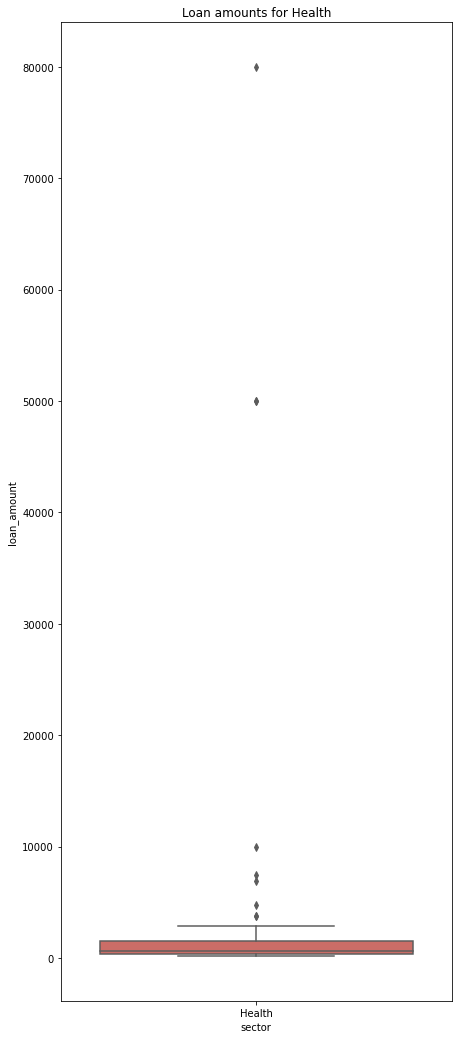

In [71]:
fig,p = plt.subplots(figsize =(7, 18))
sector = 'Health'
df_sector = df[df.sector==sector]
p = sns.boxplot(x = 'sector', y = 'loan_amount', data = df_sector)

p.set(title = f'Loan amounts for {sector}')
p.set_xticklabels(p.get_xticklabels(), rotation = 0);

#### 7. Time dependency

- variables can change over time and luckily, we 
have a time column

- Lets create a plot showing loan amnt over time

In [72]:
#converrt the date column to a datetime object

time_col = 'funded_date'
df[time_col] = pd.to_datetime(df[time_col])

In [73]:
df.funded_date

0      2014-08-03 17:51:50+00:00
1      2014-08-18 09:10:54+00:00
2      2014-08-09 17:46:35+00:00
3      2014-08-24 17:00:38+00:00
4      2014-08-25 03:24:54+00:00
                  ...           
6014   2018-07-19 15:14:35+00:00
6015   2018-07-19 19:22:43+00:00
6016   2018-07-19 20:18:53+00:00
6017   2018-07-18 23:38:44+00:00
6018   2018-07-19 16:54:18+00:00
Name: funded_date, Length: 6019, dtype: datetime64[ns, UTC]

In [74]:
df.funded_date.dtype

datetime64[ns, UTC]

In [75]:
#resample the date to monthly intervals, take the mean of the loan amount over that month
#what you now have is an array with time stamp/ month as index and the mean as the value 

time_data = df.resample('M', on = time_col)['loan_amount'].mean().fillna(0)
time_data

funded_date
2007-07-31 00:00:00+00:00     800.000000
2007-08-31 00:00:00+00:00     934.375000
2007-09-30 00:00:00+00:00    1034.482759
2007-10-31 00:00:00+00:00    1033.620690
2007-11-30 00:00:00+00:00     937.500000
                                ...     
2018-03-31 00:00:00+00:00    1884.677419
2018-04-30 00:00:00+00:00    2172.627737
2018-05-31 00:00:00+00:00    2248.090692
2018-06-30 00:00:00+00:00    1594.431818
2018-07-31 00:00:00+00:00     792.637232
Name: loan_amount, Length: 133, dtype: float64

Text(0.5, 1.0, 'Mean loan amount per month')

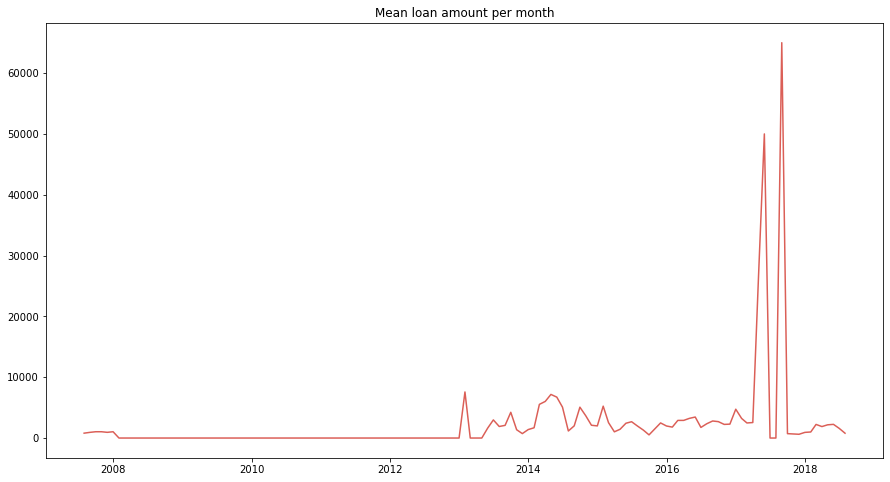

In [76]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(time_data)
plt.title('Mean loan amount per month')

Text(0.5, 1.0, 'Mean loan amount per week')

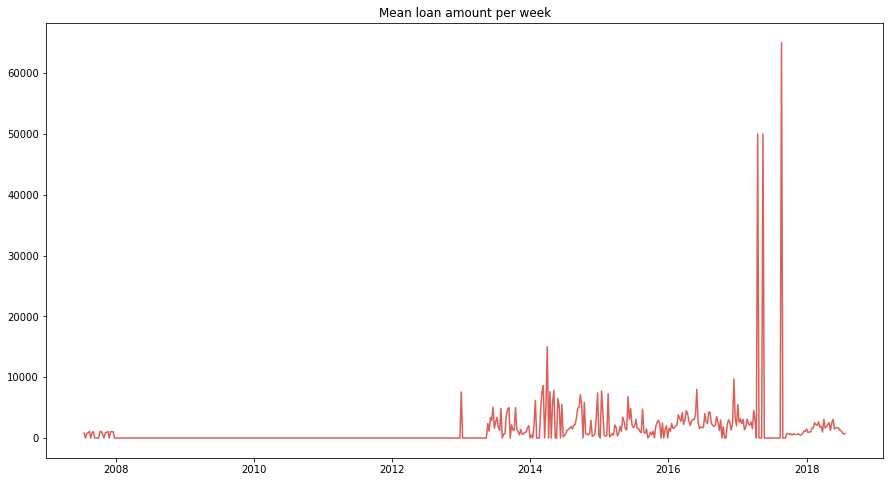

In [77]:
time_data = df.resample('7D', on = time_col)['loan_amount'].mean().fillna(0)
time_data
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(time_data)
plt.title('Mean loan amount per week')